# Disney Plus Movie Recommendation System 

Come to an adventure into the world of movie recommendations with our project, where we've developed an intelligent movie recommendation system for Disney Plus. Using the powerful cosine similarity technique, our system analyzes patterns in Disney Plus data and suggests similar movies based on user preferences. From timeless classics to the latest releases, our solution provides personalized recommendations for every viewer, offering a tailored viewing experience and enhancing the discovery of exciting content.

Link to Dataset: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

# Summary

### Chapter 1: Exploratory and Statistical Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Null Values
- 1.3: Checking Data Types
- 1.4: Final Data Analysis

### Chapter 2: Data Processing
- 2.1: Separating the Important Columns
- 2.2: Removing Spaces
- 2.3: Tag Generation
- 2.4: Handling Extra Columns

### Chapter 3: Building Recommendation Model
- 3.1: Stop Words
- 3.2: Stemming
- 3.3: CountVectorizer
- 3.4: Cosine Similarity
- 3.5: Creating a Movie Recommendation System

### Chapter 4: Tests and Conclusions
-  Final Tests and Conclusion of The Project

# Chapter 1 - Exploratory and Statistical Analysis

In this section, we take a close look at our data to understand what it can tell us. 

This step is crucial for getting to know our data better before we dive into more advanced techniques.

### 1.1: Importing Data and First Look

In [143]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [144]:
disney_df = pd.read_csv('disney_plus_titles.csv')
disney_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


As we can see, this is a dataset containing the content of Disney Plus, where we can find several well-known and lesser-known titles to the general public, along with various data about them.

The columns 'cast,' 'director,' and 'listed_in' contain names that should be combined to make them more unique. For example, 'Steven' is a common name, but 'Steven Spielberg'  is more specific and recognizable. In this case the tag would be 'StevenSpielberg' instead of 'Steven' and 'Spielberg'.

The dataset has 1450 rows and 12 columns.

In [145]:
# We'll see now what's the name of the columns.
disney_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 1.2: Checking Null Values

 We'll use 'isnull()' and 'sum()' to see how many null values the columns has.

In [146]:
# Counts the number of null values in each column of the DataFrame.
disney_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

The columns 'director,' 'cast,' and 'country' contain null values.

It's not ideal, but the tags will still work without that info.

### 1.3: Checking Data Types

'dtypes' show us the type of each column of our dataframe.

In [147]:
# Returns the data types of each column in the DataFrame disney_df.
disney_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

All columns are 'object' type.

### 1.4: Final Data Analysis

Retrieving the complete description of the movie 'Home Alone' to get an idea of the content of this important column. This column will be used later to create our tags.


In [148]:
# Find the index of the row where the title is 'Home Alone'
home_alone_index = disney_df.index[disney_df['title'].str.contains('Home Alone', case=False)].tolist()[0]

# Access the full description using the found index
home_alone_description = disney_df.loc[home_alone_index, 'description']

# Print the full description
home_alone_description

'Alone for the holidays, Max Mercer will do whatever it takes to protect his home from trespassers.'

The same process was carried out with other titles to better understand this variable.

As we can see, it's a really short description about the title.

# Chapter 2: Data Processing

This section involves formatting and consolidating relevant data columns to create a unified representation of each movie's attributes. 

The processed data will serve as the foundation for building the recommendation system.

### 2.1: Separating the Important Columns

In [149]:
# Keeping important columns for recommendation
disney_df = disney_df[['show_id', 'rating', 'type', 'title', 'release_year', 'listed_in', 'director', 'cast', 'description', ]]
disney_df.head()

,show_id,rating,type,title,release_year,listed_in,director,cast,description
0,s1,TV-G,Movie,Duck the Halls: A Mickey Mouse Christmas Special,2016,"Animation, Family","Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Join Mickey and the gang as they duck the halls!
1,s2,PG,Movie,Ernest Saves Christmas,1988,Comedy,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Santa Claus passes his magic bag to a new St. ...
2,s3,TV-G,Movie,Ice Age: A Mammoth Christmas,2011,"Animation, Comedy, Family",Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",Sid the Sloth is on Santa's naughty list.
3,s4,TV-PG,Movie,The Queen Family Singalong,2021,Musical,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...","This is real life, not just fantasy!"
4,s5,NaN,TV Show,The Beatles: Get Back,2021,"Docuseries, Historical, Music",NaN,"John Lennon, Paul McCartney, George Harrison, ...",A three-part documentary from Peter Jackson ca...


We have separated here the most relevant columns for our project.

Now, let's process the data to create our 'tags' that will be analyzed to generate the best possible recommendations based on the searched title.

### 2.2: Removing Spaces

In this section, we'll remove spaces from the 'cast', 'director', and 'listed_in' columns. Removing spaces in these cases will allow us to create more specific names that will be used in our tags.

In [150]:
# This function removes spaces from a string if the input is a string. 
# It uses the `replace()` method to replace spaces with an empty string.
# If the input is not a string, it returns the input unchanged.
def remove_space(x):
    if isinstance(x, str):
        return x.replace(" ", "")
    else:
        return x


In [151]:
# Apply the function to the desired columns
columns_to_process = ['cast', 'director', 'listed_in']
for column in columns_to_process:
    disney_df.loc[:, column] = disney_df[column].apply(remove_space)

### 2.3: Tag Generation

In this section, we generate tags for each movie by combining relevant information such as title, description, listed categories, release year, cast, director, rating, and type. 

This process creates a comprehensive representation of each movie's attributes, which will be used in the recommendation system.

In [152]:
# Turn the column 'release_year' into string
disney_df['release_year'] = disney_df['release_year'].astype(str)

# Concatenate all
disney_df['tags'] = disney_df['title'] + " " + disney_df['description'] + " " + disney_df['listed_in'] + " " + disney_df['release_year'] + " "  + disney_df['cast'] + " "  + disney_df['director'] + " " + disney_df['rating'] + " " + disney_df['type']

disney_df.head()


,show_id,rating,type,title,release_year,listed_in,director,cast,description,tags
0,s1,TV-G,Movie,Duck the Halls: A Mickey Mouse Christmas Special,2016,"Animation,Family","AlonsoRamirezRamos,DaveWasson","ChrisDiamantopoulos,TonyAnselmo,TressMacNeille...",Join Mickey and the gang as they duck the halls!,Duck the Halls: A Mickey Mouse Christmas Speci...
1,s2,PG,Movie,Ernest Saves Christmas,1988,Comedy,JohnCherry,"JimVarney,NoelleParker,DouglasSeale",Santa Claus passes his magic bag to a new St. ...,Ernest Saves Christmas Santa Claus passes his ...
2,s3,TV-G,Movie,Ice Age: A Mammoth Christmas,2011,"Animation,Comedy,Family",KarenDisher,"RaymondAlbertRomano,JohnLeguizamo,DenisLeary,Q...",Sid the Sloth is on Santa's naughty list.,Ice Age: A Mammoth Christmas Sid the Sloth is ...
3,s4,TV-PG,Movie,The Queen Family Singalong,2021,Musical,HamishHamilton,"DarrenCriss,AdamLambert,DerekHough,AlexanderJe...","This is real life, not just fantasy!","The Queen Family Singalong This is real life, ..."
4,s5,NaN,TV Show,The Beatles: Get Back,2021,"Docuseries,Historical,Music",NaN,"JohnLennon,PaulMcCartney,GeorgeHarrison,RingoS...",A three-part documentary from Peter Jackson ca...,NaN


In [153]:
disney_df['tags'][0]

'Duck the Halls: A Mickey Mouse Christmas Special Join Mickey and the gang as they duck the halls! Animation,Family 2016 ChrisDiamantopoulos,TonyAnselmo,TressMacNeille,BillFarmer,RussiTaylor,CoreyBurton AlonsoRamirezRamos,DaveWasson TV-G Movie'

Now we'll remove the commas from tags.

In [154]:
# Replaces commas with spaces in the 'tags' column of the DataFrame disney_df
disney_df.loc[:, 'tags'] = disney_df['tags'].str.replace(',', ' ')
# Accesses the first element of the 'tags' column to display the result
disney_df['tags'][0]

'Duck the Halls: A Mickey Mouse Christmas Special Join Mickey and the gang as they duck the halls! Animation Family 2016 ChrisDiamantopoulos TonyAnselmo TressMacNeille BillFarmer RussiTaylor CoreyBurton AlonsoRamirezRamos DaveWasson TV-G Movie'

In [155]:
disney_df.head()

,show_id,rating,type,title,release_year,listed_in,director,cast,description,tags
0,s1,TV-G,Movie,Duck the Halls: A Mickey Mouse Christmas Special,2016,"Animation,Family","AlonsoRamirezRamos,DaveWasson","ChrisDiamantopoulos,TonyAnselmo,TressMacNeille...",Join Mickey and the gang as they duck the halls!,Duck the Halls: A Mickey Mouse Christmas Speci...
1,s2,PG,Movie,Ernest Saves Christmas,1988,Comedy,JohnCherry,"JimVarney,NoelleParker,DouglasSeale",Santa Claus passes his magic bag to a new St. ...,Ernest Saves Christmas Santa Claus passes his ...
2,s3,TV-G,Movie,Ice Age: A Mammoth Christmas,2011,"Animation,Comedy,Family",KarenDisher,"RaymondAlbertRomano,JohnLeguizamo,DenisLeary,Q...",Sid the Sloth is on Santa's naughty list.,Ice Age: A Mammoth Christmas Sid the Sloth is ...
3,s4,TV-PG,Movie,The Queen Family Singalong,2021,Musical,HamishHamilton,"DarrenCriss,AdamLambert,DerekHough,AlexanderJe...","This is real life, not just fantasy!",The Queen Family Singalong This is real life ...
4,s5,NaN,TV Show,The Beatles: Get Back,2021,"Docuseries,Historical,Music",NaN,"JohnLennon,PaulMcCartney,GeorgeHarrison,RingoS...",A three-part documentary from Peter Jackson ca...,NaN


The tags have been successfully created!

### 2.4: Handling Extra Columns

Only a few columns will be kept along with 'tags,' just to get an idea of the content we have at hand.

In [156]:
disney_df = disney_df[['show_id','title', 'rating', 'type', 'tags']]
disney_df.head()

,show_id,title,rating,type,tags
0,s1,Duck the Halls: A Mickey Mouse Christmas Special,TV-G,Movie,Duck the Halls: A Mickey Mouse Christmas Speci...
1,s2,Ernest Saves Christmas,PG,Movie,Ernest Saves Christmas Santa Claus passes his ...
2,s3,Ice Age: A Mammoth Christmas,TV-G,Movie,Ice Age: A Mammoth Christmas Sid the Sloth is ...
3,s4,The Queen Family Singalong,TV-PG,Movie,The Queen Family Singalong This is real life ...
4,s5,The Beatles: Get Back,NaN,TV Show,NaN


In [157]:
# Count the number of words in the first row (index 0) of the 'tags' column
number_of_words = len(disney_df['tags'][0].split())

# Show the result
number_of_words

31

# Chapter 3: Building Prediction Model

This section focuses on preparing the text data for modeling. It involves essential preprocessing steps such as removing stop words and applying stemming to reduce words to their root form. The CountVectorizer is then utilized to transform the text data into a numerical format suitable for machine learning algorithms. Additionally, missing values in the 'tags' column are handled to ensure seamless integration with the model.

### 3.1: Stop Words

We'll download and load the English stop words list using the Natural Language Toolkit (NLTK). The stop words are then used to create a function called 'remove_stop_words' that removes stop words from the 'tags' column in the DataFrame.

 This step helps in preprocessing the text data by removing common words that do not contribute significantly to the meaning of the text.

In [158]:
import nltk
from nltk.corpus import stopwords

# Downloading the list of English stop words
nltk.download('stopwords')

# Loading the English stop words
stop_words = set(stopwords.words('english'))

# Assuming 'disney_df' is your DataFrame with the 'tags' column

# Function to remove stop words
def remove_stop_words(tags):
    # Check if 'tags' is a string
    if isinstance(tags, str):
        # Remove stop words
        return ' '.join([word for word in tags.split() if word.lower() not in stop_words])
    else:
        return tags  # Return the original value if it's not a string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
# Aplicando a função à coluna 'tags' usando uma expressão lambda
disney_df['tags'] = disney_df['tags'].apply(lambda x: remove_stop_words(x))
disney_df['tags'][0]

'Duck Halls: Mickey Mouse Christmas Special Join Mickey gang duck halls! Animation Family 2016 ChrisDiamantopoulos TonyAnselmo TressMacNeille BillFarmer RussiTaylor CoreyBurton AlonsoRamirezRamos DaveWasson TV-G Movie'

### 3.2: Stemming

We are going to perform the stemming process on our tags

- Stemming is the process of reducing words to their root or base form, even if the result is not a valid word. This helps to group together words with similar meanings. For example, "running," "runs," and "runner" would all be stemmed to "run."

In [160]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# Function to apply stemming to text
def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [161]:
# Apply the function to non-null values in the 'tags' column
disney_df['tags'] = disney_df['tags'].apply(lambda x: stems(x) if isinstance(x, str) else x)

In [162]:
disney_df.iloc[0]['tags']

'duck halls: mickey mous christma special join mickey gang duck halls! anim famili 2016 chrisdiamantopoulo tonyanselmo tressmacneil billfarm russitaylor coreyburton alonsoramirezramo davewasson tv-g movi'

### 3.3: Word Cloud

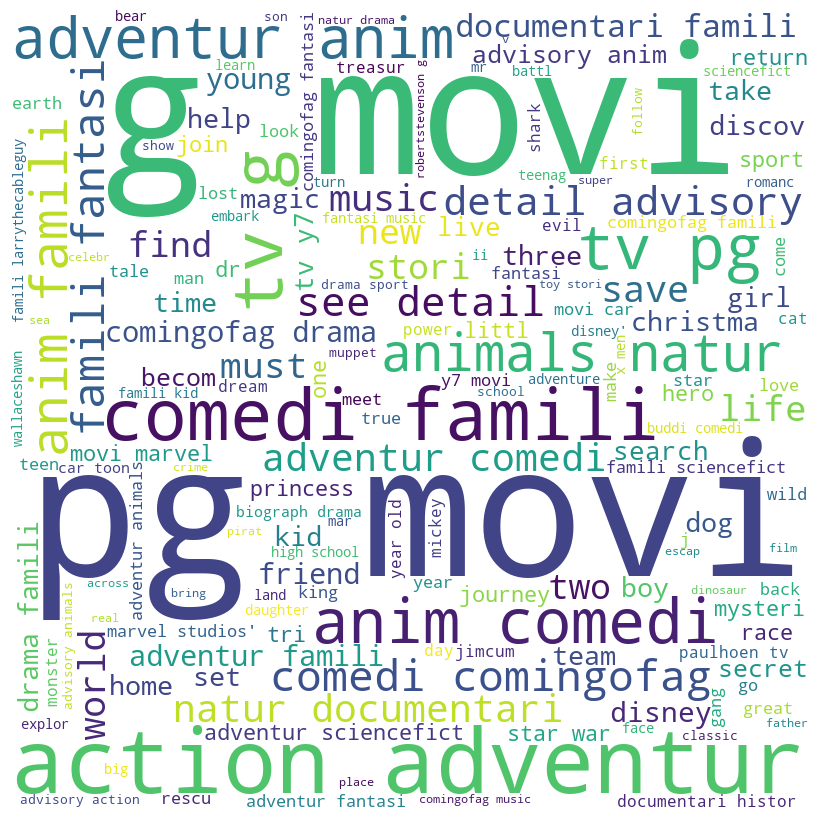

In [163]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert NaN values to empty strings and concatenate all tags into a single string
tags_text = ' '.join(disney_df['tags'].fillna(''))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=None, 
                      min_font_size=10).generate(tags_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0)

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('wordcloud_disney_tags.png', bbox_inches='tight')

plt.show()

### 3.4: CountVectorizer

We're about to apply CountVectorizer to our tags, converting them into numerical representations for analysis.

- CountVectorizer is a method used for converting a collection of text documents into a matrix of token counts. It essentially converts text data into numerical data that can be used by machine learning algorithms.

In [164]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with maximum 5000 features and English stop words
cv = CountVectorizer(max_features=5000,stop_words='english')

# Fill NaN values with an empty string
disney_df['tags'].fillna('', inplace=True)

vector = cv.fit_transform(disney_df['tags']).toarray()

In [165]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
vector.shape

(1450, 5000)

In [167]:
len(cv.get_feature_names_out())

5000

In [168]:
# # Save the DataFrames into CSV file
# disney_df.to_csv('disney_df_clean.csv', index=False)

# # Save the DataFrames into Excel file
# disney_df.to_excel('disney_df_clean.xlsx', index=False)

### 3.5: Cosine Similarity

We're going to apply Cosine Similarity to our tags now, assessing the similarity between them for better analysis.

- Cosine similarity is a measure that quantifies the similarity between two numerical vectors, often used in natural language processing and recommendation tasks. It measures the cosine of the angle between the two vectors and ranges from -1 (completely different) to 1 (identical), with 0 indicating that the vectors are orthogonal (unrelated). In text processing contexts, vectors typically represent word frequencies in documents. Cosine similarity is useful for finding similar documents or calculating the proximity between words based on their occurrence context.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between vectors
similarity = cosine_similarity(vector)

In [ ]:
similarity.shape

(1450, 1450)

### 3.6: Creating a Movie Recommendation System

We'll define a function called 'recommend' that takes a movie title as input. It retrieves the index of the movie in the DataFrame, calculates the cosine similarity between the selected movie and all others, sorts them by similarity, and then prints the titles of the 20 most similar movies.

In [ ]:
def recommend(movie):
    index = disney_df[disney_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:21]:
        print(disney_df.iloc[i[0]].title)

# Chapter 4: Tests and Conclusions


In this final stage, we will test our recommendation system with some movie titles to see what it suggests to us.

In [ ]:
recommend('Home Alone')

Home Alone 2: Lost in New York
Home Sweet Home Alone
Home Alone 3
I'll Be Home for Christmas
We Bought a Zoo
In Beaver Valley
Mr. Boogedy
The Proud Family Movie
Home on the Range
The Sandlot: Heading Home
Lady and the Tramp
Cheaper by the Dozen 2
George & A.J.
The Happiest Millionaire
Pluto's Christmas Tree
The Haunted Mansion
Tim Burton’s The Nightmare Before Christmas
Mrs. Doubtfire
Jingle All the Way 2
Herbie Rides Again


When we input the movie "Home Alone" into our recommendation system, it suggests some titles related to Christmas, such as "I'll Be Home for Christmas" and "Tim Burton’s The Nightmare Before Christmas", which perfectly aligns with the originally entered film.

In [ ]:
recommend("Simpsons Movie")

The Simpsons in Plusaversary
The Good, The Bart, and The Loki
G-Force
Marvel Studios' Ant-Man
Around the World in 80 Days
Planes
The Lion King 1 1/2
Ice Age: Collision Course
A Goofy Movie
Valiant
Toy Story 4
Avatar
Finding Dory
Moana
Pirates of the Caribbean: At World's End
Underdog
The Book of Life
X-Men
Enchanted
Bolt


When we entered "Simpsons Movie" into our recommendation system, it suggested other content from "The Simpsons" and various other compatible titles. However, what caught our attention was the suggestion of "The Good, The Bart, and The Loki," a short film from "The Simpsons" series that does not include the family name in the title. This is a good sign that our tags are functioning effectively.

In [ ]:
recommend('Star Wars: The Phantom Menace (Episode I)')

Star Wars: Attack of the Clones (Episode II)
Star Wars: Revenge of the Sith (Episode III)
Star Wars: A New Hope (Episode IV)
Star Wars: The Empire Strikes Back (Episode V)
Star Wars: The Rise of Skywalker (Episode IX)
Star Wars: Return of the Jedi (Episode VI)
Star Wars: The Last Jedi (Episode VIII)
Star Wars: The Force Awakens (Episode VII)
Flight of the Navigator
Rogue One: A Star Wars Story
Skyrunners
Solo: A Star Wars Story
LEGO Star Wars: The New Yoda Chronicles – Duel of the Skywalkers
Ewoks: The Battle for Endor
X-Men: The Last Stand
Caravan of Courage: An Ewok Adventure
Percy Jackson & The Olympians: The Lightning Thief
Avatar
The Adventures of Bullwhip Griffin
Marvel Studios' Thor: The Dark World


When testing our system with the title 'Star Wars: The Phantom Menace (Episode I)' it suggests several titles from the franchise, including the spin-offs 'Solo: A Star Wars Story' and 'Rogue One: A Star Wars Story,' as well as 'Caravan of Courage: An Ewok Adventure,' which is part of the franchise.

Apparently, our recommendation system is fulfilling its purpose.